# Import library

In [2]:

!pip install rioxarray
!pip install salem
!pip install rioxarray
!pip install cartopy

In [3]:
import xarray as xr
from scipy.interpolate import griddata
import salem
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import geopandas as gpd
import pandas as pd
import netCDF4
import rioxarray  # Necessário para habilitar o método .rio
#from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')
#ncfile = 'dados_iag/interpolated_wind.nc'
#print(ncfile)
#data = Dataset(ncfile)

In [2]:
import xarray as xr
import numpy as np
from scipy.interpolate import griddata
import salem
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import pandas as pd
import netCDF4
import rioxarray

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
df = xr.open_dataset('/content/drive/MyDrive/Data_meteo/interpolated_pm.nc')
ds = xr.open_dataset('/content/drive/MyDrive/Data_meteo/interpolated_wind.nc')

# Convertendo as unidades

In [6]:
temp = ds['t2m']- 273.15
dewpoint = ds['d2m'] - 273.15
pressure = ds['sp']/100
precip = ds['tp']*1000

In [36]:
# Carregar o shapefile
shp_lu = gpd.read_file("/content/drive/MyDrive/Data_meteo/AGO_ATUAL/Nova_Luanda.shp")

# Carregar o shapefile de Angola
shp_ago = gpd.read_file("/content/drive/MyDrive/Data_meteo/AGO_ATUAL/NOVA ANGOLA_SHP/NOVA_ANGOLA.shp")

In [42]:
# Converter as direcões do Ventos do ERA5
def wind_dir(u, v):
    """Compute the wind direction from u and v-components.
    """
    wdir = np.mod(180 + np.rad2deg(np.arctan2(v, u)), 360)
    return wdir
# Converter as Velocidade do Ventos do ERA5
def wind_speed(u, v):
    """Help you to compute the speed."""
    wspeed = np.sqrt(u * u + v * v)
    return wspeed

In [41]:
# Funcao do ventos e direccao
wdir=wind_dir(ds['u10'] ,ds['v10'])
wspeed=wind_speed(ds['u10'] ,ds['v10'])

In [43]:
# Agora, filtre o dataset para o dia de interesse (2021-03-06) e velocidade
ds_day = wspeed.sel(valid_time='2021-03-06')

# Calcule a média do dia
wspeed_mean = ds_day.mean(dim='valid_time')
#print(wspeed_mean)

In [45]:
# Agora, filtre o dataset para o dia de interesse (2021-03-06) e velocidade
ds_day = wdir.sel(valid_time='2021-03-06')

# Calcule a média do dia
wdir_mean = ds_day.mean(dim='valid_time')
#print(wdir_mean)

In [46]:
# Convertendo direção e velocidade do vento em u e v (caso não tenha feito isso ainda)

lon = wspeed_mean['longitude']  # Coordenadas de longitude
lat = wspeed_mean['latitude']  # Coordenadas de latitude

In [47]:
lon, lat = np.meshgrid(lon, lat)  # Transformar lon e lat em grades 2D

In [48]:
u = -wspeed_mean * np.sin(np.deg2rad(wdir_mean))
v = -wspeed_mean * np.cos(np.deg2rad(wdir_mean))

In [49]:
import numpy as np

# Verifique se os dados são do tipo float
lon = np.array(lon, dtype=float)
lat = np.array(lat, dtype=float)
u = np.array(u, dtype=float)
v = np.array(v, dtype=float)
wspeed_mean = np.array(wspeed_mean, dtype=float)

In [50]:
# Remover ou substituir valores NaN e Inf nos dados
lon = np.nan_to_num(lon)
lat = np.nan_to_num(lat)
u = np.nan_to_num(u)
v = np.nan_to_num(v)
wspeed_mean = np.nan_to_num(wspeed_mean)

In [51]:
# Suponha que as variáveis de temperatura e ponto de orvalho estejam disponíveis
temperatura = ds['t2m'] #- 273.15 # em °C, ou ajuste se necessário
ponto_de_orvalho = ds['d2m'] #- 273.15 # Converta de Kelvin para Celsius, se necessário

# Calcule a umidade relativa com a fórmula baseada no ponto de orvalho
umidade_relativa = 100 * np.exp((17.625 * ponto_de_orvalho) / (ponto_de_orvalho + 243.04) -
                              (17.625 * temperatura) / (temperatura + 243.04))

# Limitar valores para evitar resultados fora do intervalo 0-100%
umidade_relativa = umidade_relativa.clip(0, 100)

# Adicionar a umidade relativa como uma nova variável no dataset
ds['HR'] = umidade_relativa.round(1)
#print(ds['HR'])

# CALCULO DE MEDIA DE TEMP, DEWNPOINT, HR, PM1 E PM10

In [ ]:
import numpy as np

# Verifique se os dados são do tipo float
lon = np.array(lon, dtype=float)
lat = np.array(lat, dtype=float)
u = np.array(u, dtype=float)
v = np.array(v, dtype=float)
wspeed_mean = np.array(wspeed_mean, dtype=float)


In [ ]:
# Remover ou substituir valores NaN e Inf nos dados
lon = np.nan_to_num(lon)
lat = np.nan_to_num(lat)
u = np.nan_to_num(u)
v = np.nan_to_num(v)
wspeed_mean = np.nan_to_num(wspeed_mean)


# Temperature data frame

In [58]:
# Se o problema for com a variável de tempo e você precisa decodificar ela corretamente:
ds['valid_time'] = xr.decode_cf(ds)['valid_time']

# Caso você precise extrair uma variável específica, como 't2m', de um dataset:
t2m = ds['t2m'] - 273.15

# Agora, você pode aplicar qualquer operação ou manipulação diretamente em 't2m'

# Agora, filtre o dataset para o dia de interesse (2021-03-06)
ds_day = t2m.sel(valid_time='2021-03-06')

# Calcule a média do dia
t2m_mean = ds_day.mean(dim='valid_time')

# Mostre a média do dia
#(t2m_mean)


Dewpoint data frame

In [57]:

#ds['valid_time'] = xr.decode_cf(ds)['valid_time']

# Caso você precise extrair uma variável específica, como 't2m', de um dataset:
d2m = ds['d2m'] - 273.15

# Agora, você pode aplicar qualquer operação ou manipulação diretamente em 't2m'
# Agora, filtre o dataset para o dia de interesse (2021-03-06)
ds_day = d2m.sel(valid_time='2021-03-06')

# Calcule a média do dia
d2m_mean = ds_day.mean(dim='valid_time')

# Mostre a média do dia
#print(d2m_day_mean)

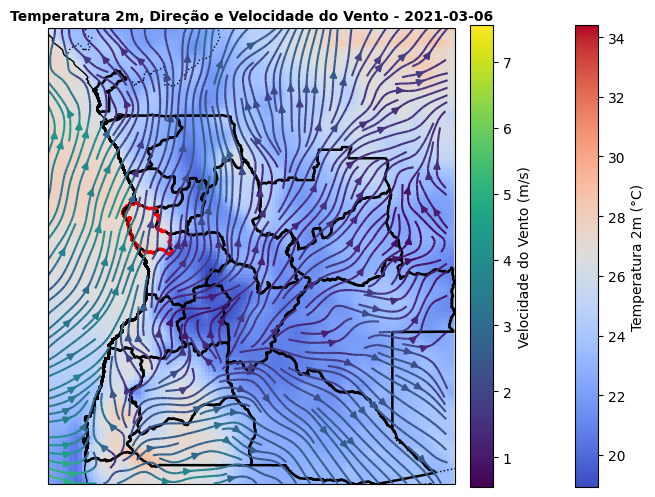

In [67]:

# Selecionar a área de interesse no shapefile (exemplo: a província de Luanda)
area_interesse = shp_ago[shp_ago['Name 1'] == 'Luanda']

# Configurar a projeção e o mapa com Cartopy
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajuste a extensão conforme necessário para Angola
ax.set_extent([10.5, 24.09, -18, -3], crs=ccrs.PlateCarree())

# Plotar o dado de temperatura (campo escalar)
temp_plot = t2m_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm', #coolwarm RdBu
    cbar_kwargs={'label': 'Temperatura 2m (°C)'}
)

# Converter wdir_mean e wspeed_mean para componentes u e v
u = -wspeed_mean * np.sin(np.deg2rad(wdir_mean))
v = -wspeed_mean * np.cos(np.deg2rad(wdir_mean))

# Normalizar os dados de velocidade do vento para mapeamento de cores
norm = Normalize(vmin=np.min(wspeed_mean), vmax=np.max(wspeed_mean))

# Plotar as streamlines (linhas de corrente)
strm = ax.streamplot(lon, lat, u, v,
            color=wspeed_mean, # Usar a magnitude da velocidade para colorir
            linewidth=1.5,  cmap='viridis', transform=ccrs.PlateCarree(), density=2, norm=norm

)

# Adicionar uma barra de cor para as linhas de corrente
cbar = fig.colorbar(strm.lines, ax=ax, orientation='vertical', pad=0.03)
cbar.set_label("Velocidade do Vento (m/s)", fontsize=10)

# Adicionar o shapefile completo ao mapa
shp_ago.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.8)

# Destacar a área de interesse com uma cor e contorno mais espesso
area_interesse.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2.5, linestyle='--')

# Adicionar elementos do mapa
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Título e exibição
plt.title("Temperatura 2m, Direção e Velocidade do Vento - 2021-03-06", fontsize=10, fontweight='bold')

# Save the figure
plt.savefig("temp_wind.png", dpi=300, bbox_inches='tight')  # Save as PNG

plt.show()

# Relação de Ponto de orvalho com vento e direção

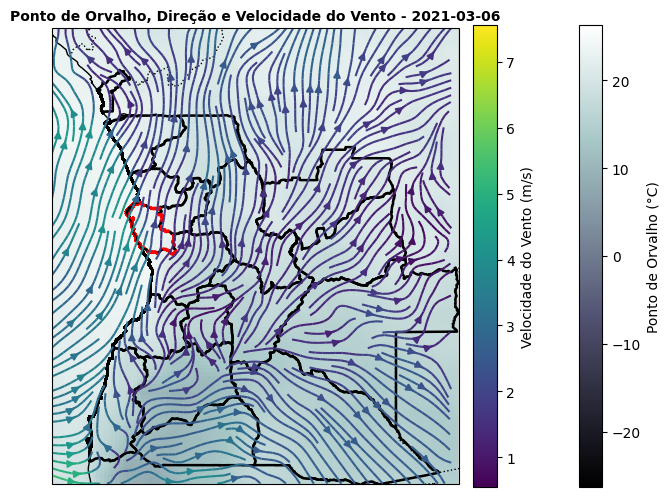

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm
from matplotlib.colors import Normalize
import seaborn as sns  # Importe o Seaborn

# Configurar a projeção e o mapa com Cartopy
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajuste a extensão conforme necessário para Angola
ax.set_extent([10.5, 24.09, -18, -3], crs=ccrs.PlateCarree())

# Plotar o dado de temperatura (campo escalar)
dewpoint_plot = d2m_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='bone', #coolwarm RdBu
    cbar_kwargs={'label': 'Ponto de Orvalho (°C)'}
)

# Converter wdir_mean e wspeed_mean para componentes u e v
u = -wspeed_mean * np.sin(np.deg2rad(wdir_mean))
v = -wspeed_mean * np.cos(np.deg2rad(wdir_mean))

# Normalizar os dados de velocidade do vento para mapeamento de cores
norm = Normalize(vmin=np.min(wspeed_mean), vmax=np.max(wspeed_mean))

# Plotar as streamlines (linhas de corrente)
strm = ax.streamplot(lon, lat, u, v,
            color=wspeed_mean, # Usar a magnitude da velocidade para colorir
            linewidth=1.5,  cmap='viridis', transform=ccrs.PlateCarree(), density=2, norm=norm

)

# Adicionar uma barra de cor para as linhas de corrente
cbar = fig.colorbar(strm.lines, ax=ax, orientation='vertical', pad=0.03)
cbar.set_label("Velocidade do Vento (m/s)", fontsize=10)

# Adicionar o shapefile completo ao mapa
shp_ago.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.8)

# Destacar a área de interesse com uma cor e contorno mais espesso
area_interesse.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2.5, linestyle='--')

# Adicionar elementos do mapa
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Título e exibição
plt.title("Ponto de Orvalho, Direção e Velocidade do Vento - 2021-03-06", fontsize=10, fontweight='bold')

# Save the figure
plt.savefig("temp_dewpoint.png", dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()


# Relação do vento com humidade relativa

In [74]:
# Agora, filtre o dataset para o dia de interesse (2021-03-06) e velocidade
ds_day = ds['HR'].sel(valid_time='2021-03-06')

# Calcule a média do dia
HR_mean = ds_day.mean(dim='valid_time')
print(HR_mean)

<xarray.DataArray 'HR' (latitude: 226, longitude: 226)> Size: 409kB
array([[86.17916667, 85.44166667, 84.70833333, ..., 58.87916667,
        58.91666667, 58.94583333],
       [86.77916667, 86.07916667, 85.37916667, ..., 59.0625    ,
        59.0625    , 59.05833333],
       [87.4       , 86.72083333, 86.06666667, ..., 59.25416667,
        59.22916667, 59.175     ],
       ...,
       [92.19166667, 92.20833333, 92.22916667, ..., 87.8625    ,
        87.78333333, 87.69583333],
       [92.12083333, 92.1625    , 92.19583333, ..., 87.82083333,
        87.75416667, 87.6875    ],
       [92.04166667, 92.1125    , 92.16666667, ..., 87.77916667,
        87.72916667, 87.68333333]])
Coordinates:
  * latitude   (latitude) float64 2kB 10.0 9.876 9.751 ... -17.75 -17.88 -18.0
  * longitude  (longitude) float64 2kB -4.0 -3.876 -3.751 ... 23.75 23.88 24.0
    number     int32 4B ...


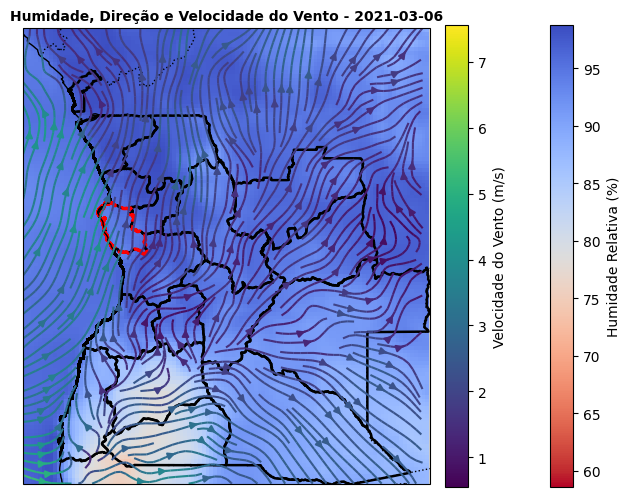

In [76]:

# Configurar a projeção e o mapa com Cartopy
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajuste a extensão conforme necessário para Angola
ax.set_extent([10.5, 24.09, -18, -3], crs=ccrs.PlateCarree())

# Plotar o dado de temperatura (campo escalar)
Humidade_plot = HR_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm_r', #coolwarm RdBu
    cbar_kwargs={'label': 'Humidade Relativa (%)'}
)

# Converter wdir_mean e wspeed_mean para componentes u e v
u = -wspeed_mean * np.sin(np.deg2rad(wdir_mean))
v = -wspeed_mean * np.cos(np.deg2rad(wdir_mean))

# Normalizar os dados de velocidade do vento para mapeamento de cores
norm = Normalize(vmin=np.min(wspeed_mean), vmax=np.max(wspeed_mean))

# Plotar as streamlines (linhas de corrente)
strm = ax.streamplot(lon, lat, u, v,
            color=wspeed_mean, # Usar a magnitude da velocidade para colorir
            linewidth=1.5, cmap='viridis', transform=ccrs.PlateCarree(), density=2, norm=norm

)

# Adicionar uma barra de cor para as linhas de corrente
cbar = fig.colorbar(strm.lines, ax=ax, orientation='vertical', pad=0.03)
cbar.set_label("Velocidade do Vento (m/s)", fontsize=10)

# Adicionar o shapefile completo ao mapa
shp_ago.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.8)

# Destacar a área de interesse com uma cor e contorno mais espesso
area_interesse.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2.5, linestyle='--')

# Adicionar elementos do mapa
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Título e exibição
plt.title("Humidade, Direção e Velocidade do Vento - 2021-03-06", fontsize=10, fontweight='bold')

# Save the figure
plt.savefig("HR_wind.png", dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

# Relação do vento com Particula de Materia (PM1 e PM10)

In [77]:
df

<xarray.Dataset> Size: 10MB
Dimensions:     (valid_time: 240, latitude: 50, longitude: 50)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2kB 2021-03-01 ... 2021-03-30T21:...
  * latitude    (latitude) float64 400B -18.0 -17.72 -17.45 ... -4.776 -4.5
  * longitude   (longitude) float64 400B 10.0 10.31 10.61 ... 24.39 24.69 25.0
Data variables:
    pm1         (valid_time, latitude, longitude) float64 5MB ...
    pm10        (valid_time, latitude, longitude) float64 5MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-11T23:44 GRIB to CDM+CF via cfgrib-0.9.1...

INTERPORLAÇÃO DO DADOS PM1 10

Calculando a media do PM1 e PM2

In [79]:

# Agora, filtre o dataset para o dia de interesse (2021-03-06) e velocidade
ds_day = df['pm1'].sel(valid_time='2021-03-06')

# Calcule a média do dia
pm1_mean = ds_day.mean(dim='valid_time')
#print(pm1_mean)

In [81]:

# Agora, filtre o dataset para o dia de interesse (2021-03-06) e velocidade
ds_day = df['pm10'].sel(valid_time='2021-03-06')

# Calcule a média do dia
pm10_mean = ds_day.mean(dim='valid_time')
#print(pm10_mean)

# Plot PM1 e PM10

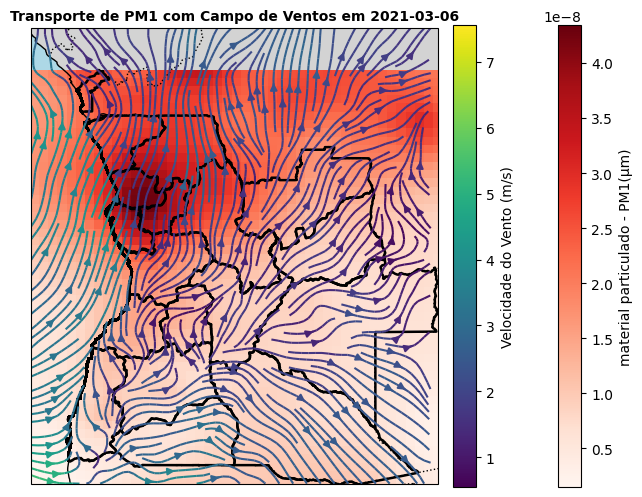

In [96]:

# Configurar a projeção e o mapa com Cartopy
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajuste a extensão conforme necessário para Angola
ax.set_extent([10.5, 24.09, -18, -3], crs=ccrs.PlateCarree())

# Plotar o dado de temperatura (campo escalar)
pm1_mean_plot = pm1_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='Reds', #coolwarm RdBu
    cbar_kwargs={'label': 'material particulado - PM1(μm)'}
)

# 4. Plotando a concentração de PM1 como fundo (contorno preenchido)
#pm1_plot = ax.contourf(pm1_mean['longitude'], pm1_mean['latitude'], pm1_mean, levels=60, cmap='Reds', transform=ccrs.PlateCarree())
#plt.colorbar(pm1_plot, ax=ax, label="Concentração de PM1 (µg/m³)")

# Converter wdir_mean e wspeed_mean para componentes u e v
u = -wspeed_mean * np.sin(np.deg2rad(wdir_mean))
v = -wspeed_mean * np.cos(np.deg2rad(wdir_mean))

# Normalizar os dados de velocidade do vento para mapeamento de cores
norm = Normalize(vmin=np.min(wspeed_mean), vmax=np.max(wspeed_mean))

# Plotar as streamlines (linhas de corrente)
strm = ax.streamplot(lon, lat, u, v,
            color=wspeed_mean, # Usar a magnitude da velocidade para colorir
            linewidth=1.5, cmap='viridis', transform=ccrs.PlateCarree(), density=2, norm=norm

)

# Adicionar uma barra de cor para as linhas de corrente
cbar = fig.colorbar(strm.lines, ax=ax, orientation='vertical', pad=0.03)
cbar.set_label("Velocidade do Vento (m/s)", fontsize=10)

# Adicionar o shapefile completo ao mapa
shp_ago.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.8)

# Destacar a área de interesse com uma cor e contorno mais espesso(Shapefile)
area_interesse.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=2.5, linestyle='--')

# Adicionar elementos do mapa
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Título e exibição
plt.title("Transporte de PM1 com Campo de Ventos em 2021-03-06", fontsize=10, fontweight='bold')

# Save the figure
plt.savefig("PM1_wind.png", dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

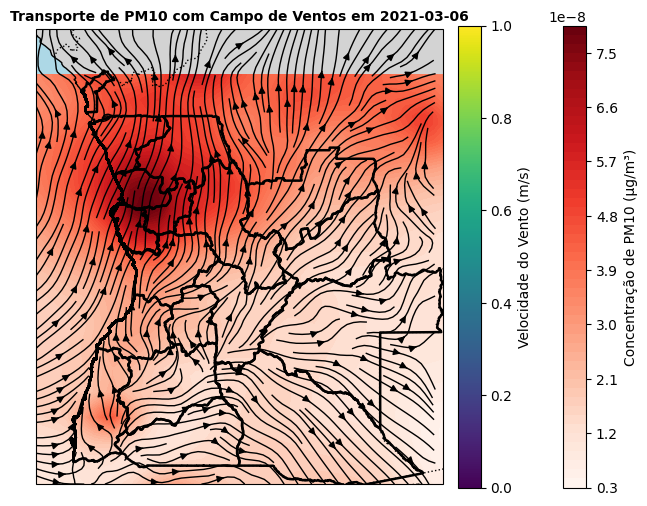

In [97]:

# Configurar a projeção e o mapa com Cartopy
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajuste a extensão conforme necessário para Angola
ax.set_extent([10.5, 24.09, -18, -3], crs=ccrs.PlateCarree())


# 4. Plotando a concentração de PM1 como fundo (contorno preenchido)
pm10_plot = ax.contourf(pm10_mean['longitude'], pm10_mean['latitude'], pm10_mean, levels=60, cmap='Reds', transform=ccrs.PlateCarree())
plt.colorbar(pm10_plot, ax=ax, label="Concentração de PM10 (µg/m³)")

# 5. Adicionando o campo de vento como linhas de fluxo (streamlines)
strm = ax.streamplot(u['longitude'], v['latitude'], u, v, color='k', linewidth=1, density=2, transform=ccrs.PlateCarree())

# 4. Plotando a concentração de PM1 como fundo (contorno preenchido)
#pm1_plot = ax.contourf(pm1_mean['longitude'], pm1_mean['latitude'], pm1_mean, levels=60, cmap='Reds', transform=ccrs.PlateCarree())
#plt.colorbar(pm1_plot, ax=ax, label="Concentração de PM1 (µg/m³)")

# Converter wdir_mean e wspeed_mean para componentes u e v
u = -wspeed_mean * np.sin(np.deg2rad(wdir_mean))
v = -wspeed_mean * np.cos(np.deg2rad(wdir_mean))

# Normalizar os dados de velocidade do vento para mapeamento de cores
norm = Normalize(vmin=np.min(wspeed_mean), vmax=np.max(wspeed_mean))

# Adicionar uma barra de cor para as linhas de corrente
cbar = fig.colorbar(strm.lines, ax=ax, orientation='vertical', pad=0.03)
cbar.set_label("Velocidade do Vento (m/s)", fontsize=10)

# Adicionar o shapefile completo ao mapa
shp_ago.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.8)

# Destacar a área de interesse com uma cor e contorno mais espesso
area_interesse.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=2.5, linestyle='--')

# Adicionar elementos do mapa
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Título e exibição
plt.title("Transporte de PM10 com Campo de Ventos em 2021-03-06", fontsize=10, fontweight='bold')

# Save the figure
plt.savefig("PM10_wind.png", dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

# Correlação PM1,10 vs Precipitação

In [98]:
# "Transporte de PM1 com Campo de Ventos em 2021-03-06"

# Correlação PM1,10 vs Humidade